In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv('cleaned.csv')

df = df.drop(columns=['Row ID','ZIP Code Location', 'ZIP Code'])


In [3]:
#Fix Column Names
df.columns = df.columns.str.strip().str.lower().str.replace('-', '').str.replace(' ', '_').str.replace('__', '_')


In [4]:
X = df.drop('deaths_weekly', axis = 1)
y = df['deaths_weekly'].values.reshape(-1, 1)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

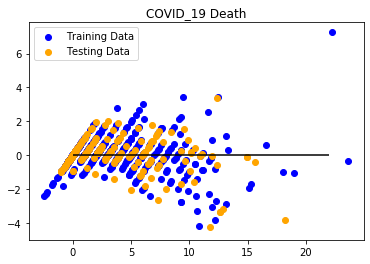

In [7]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("COVID_19 Death")
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9323251415436649, R2: 0.9479650141495913


In [9]:
# LASSO model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions3 = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9323251415436649, R2: 0.9482807255194577


In [10]:
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions1 = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9323251415436649, R2: 0.9479693899437432


In [11]:
# ElasticNet model
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions2 = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9323251415436649, R2: 0.9482733634153546


In [12]:
y_test_list = []
for y in y_test:
    y_test_list.append(y[0])
predictions_list = []
for pred in predictions:
    predictions_list.append(pred[0])


In [13]:
comparison = pd.DataFrame({"Predicted": predictions_list, "Actual": y_test_list})
print(comparison)

     Predicted  Actual
0     9.534734       8
1     5.608072       6
2     0.140884       0
3     3.266077       3
4     0.235446       0
..         ...     ...
194   0.035659       0
195   7.145177       6
196   3.001664       1
197   4.955864       7
198   6.550937       6

[199 rows x 2 columns]


In [ ]:
comparison.to_csv('actual_predicted.csv')